In [56]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [27]:
datasetFurnace = pd.read_csv('furnace_data.csv',sep=',',encoding='utf-8')

In [28]:
datasetRaw = pd.read_csv('raw_material_data.csv',sep=',',encoding='utf-8')

In [29]:
# casting date to year only 
#datasetRaw['Date'] = pd.to_datetime(datasetRaw['Date']).dt.date

In [30]:
datasetRaw.head().T

,0,1,2,3,4
Date,2019-01-01 23:00:00,2019-01-02 23:00:00,2019-01-03 02:00:00,2019-01-04 23:00:00,2019-01-05 23:00:00
Feature 1,89.5,89.3,89.31,89.39,89.63
Feature 2,85.06,84.32,84.39,84.6,84.87
Feature 3,95.0391,94.4233,94.4911,94.6415,94.6893
C Content,2.02,2.5,2.5,2.52,2.36
S Content,0.0054,0.0037,0.0017,0.0013,2
Feature 4,5.7276,6.4242,6.3468,6.1791,6.1404
Feature 5,6.85,6.94,2563,2556,2552


In [31]:
datasetFurnace.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Grade,Grade_1,Grade_1,Grade_1,Grade_1,Grade_1
Raw Material 1,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3
Raw Material 2,NaN,NaN,NaN,NaN,NaN
Charge Raw Material 99,22,NaN,15,NaN,NaN
Charge Raw Material 1,178486,167665,126579,149.36,149404
Charge Raw Material 2,NaN,NaN,NaN,NaN,NaN
Total Charge,200486,167665,141579,149.36,149404
Power Start,2019-01-01 05:58:30,2019-01-01 07:05:44,2019-01-01 07:57:36,2019-01-01 09:48:55,2019-01-01 10:35:11
Tap Weight,129.3,130.32,132.91,128.51,130.53


In [32]:
list(datasetRaw.columns)

['Date',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'C Content',
 'S Content',
 'Feature 4',
 'Feature 5']

In [33]:
datasetFurnace.columns[datasetFurnace.isnull().any()].tolist()

['Grade',
 'Raw Material 1',
 'Raw Material 2',
 'Charge Raw Material 99',
 'Charge Raw Material 1',
 'Charge Raw Material 2',
 'Total Charge',
 'Power Start',
 'Tap Weight',
 'Tap Time',
 'Last Temperature',
 'Tap Duration',
 'Liquid Metal Yield',
 'Gross Production',
 'Prime Production',
 'MS Yield',
 'Tap To Tap Time',
 'Power ON Time',
 'Power OFF Time',
 'Mins./Heat_Operation',
 'Energy Consumption kWh',
 'Power MW',
 'Total Energy Consumption kWh',
 'Natural Gas Nm³',
 'Natural Gas Nm³/t',
 'Oxygen Lancing Nm³',
 'Oxygen Burner Nm³',
 'Total Oxygen Nm³',
 'Oxygen Nm³/t',
 'Carbon Injection Kg',
 'Carbon Injection Kg/t',
 'LimeCC',
 'DoloCC',
 'Slag Analysis B2',
 'Slag Analysis B3',
 'Furnace First Temperature',
 'Raw Material Temperature',
 'Date']

In [34]:
datasetRaw.columns[datasetRaw.isnull().any()].tolist()

['Date',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'C Content',
 'S Content',
 'Feature 4',
 'Feature 5']

In [35]:
datasetRaw = datasetRaw.fillna(0)

In [36]:
datasetFurnace = datasetFurnace.fillna(0)

In [37]:
datasetRaw.head().T

,0,1,2,3,4
Date,2019-01-01 23:00:00,2019-01-02 23:00:00,2019-01-03 02:00:00,2019-01-04 23:00:00,2019-01-05 23:00:00
Feature 1,89.5,89.3,89.31,89.39,89.63
Feature 2,85.06,84.32,84.39,84.6,84.87
Feature 3,95.0391,94.4233,94.4911,94.6415,94.6893
C Content,2.02,2.5,2.5,2.52,2.36
S Content,0.0054,0.0037,0.0017,0.0013,2
Feature 4,5.7276,6.4242,6.3468,6.1791,6.1404
Feature 5,6.85,6.94,2563,2556,2552


In [38]:
datasetFurnace.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Grade,Grade_1,Grade_1,Grade_1,Grade_1,Grade_1
Raw Material 1,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3
Raw Material 2,0,0,0,0,0
Charge Raw Material 99,22,0,15,0,0
Charge Raw Material 1,178486,167665,126579,149.36,149404
Charge Raw Material 2,0,0,0,0,0
Total Charge,200486,167665,141579,149.36,149404
Power Start,2019-01-01 05:58:30,2019-01-01 07:05:44,2019-01-01 07:57:36,2019-01-01 09:48:55,2019-01-01 10:35:11
Tap Weight,129.3,130.32,132.91,128.51,130.53


In [39]:
# rawMaterial1 e rawMaterial3
rawMaterial1data = datasetFurnace.groupby('Raw Material 1')['Raw Material 1'].count()

In [40]:
rawMaterial1data

Raw Material 1
0                  1305
RawMaterialHot1    7853
RawMaterialHot3    7565
Name: Raw Material 1, dtype: int64

In [41]:
datasetFurnace['Raw Material 1'].value_counts()

RawMaterialHot1    7853
RawMaterialHot3    7565
0                  1305
Name: Raw Material 1, dtype: int64

In [42]:
datasetFurnace['Raw Material 2'].value_counts()

0                   12289
RawMaterialCold3     3050
RawMaterialCold1     1384
Name: Raw Material 2, dtype: int64

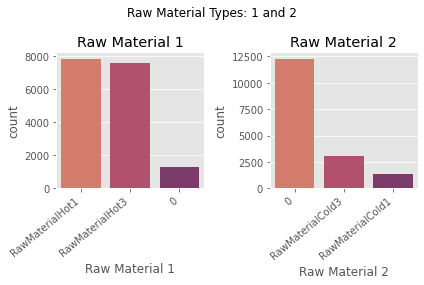

In [43]:
# Tipos de matéria prima

figure1, axes = plt.subplots(ncols=2)
figure1.suptitle('Raw Material Types: 1 and 2')

graph1 = sns.countplot(x='Raw Material 1', data=datasetFurnace, order = datasetFurnace['Raw Material 1'].value_counts().index, palette='flare',ax=axes[0])
axes[0].set_title('Raw Material 1')

graph2 = sns.countplot(x='Raw Material 2', data=datasetFurnace, order = datasetFurnace['Raw Material 2'].value_counts().index, palette='flare',ax=axes[1])
axes[1].set_title('Raw Material 2')

graph1.set_xticklabels(graph1.get_xticklabels(), rotation=40, ha="right")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=40, ha="right")

figure1.tight_layout()


In [44]:
# C e S correlacao semelhancas
df = datasetRaw.drop(columns = ['Feature 1','Feature 2','Feature 3', 'Feature 4', 'Feature 5'],axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,C Content,S Content
C Content,1.000000,0.041904
S Content,0.041904,1.000000


Text(0.5, 0, '')

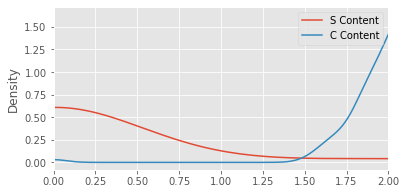

In [45]:
#plotando o grafico superior
datasetRaw.plot.density(y=['S Content', 'C Content'],xlim=[0,2],figsize=[6,3])
plt.xlabel("")

In [46]:
df1 = datasetFurnace.iloc[:, 36:38]

In [47]:
print(df1)

       Furnace First Temperature  Raw Material Temperature
0                         1605.0                     528.0
1                         1574.0                     509.0
2                         1610.0                     527.0
3                         1582.0                     516.0
4                         1560.0                     505.0
...                          ...                       ...
16718                     1601.0                     563.0
16719                     1601.0                     563.0
16720                     1604.0                     567.0
16721                     1612.0                     566.0
16722                     1577.0                     568.0

[16723 rows x 2 columns]


In [48]:
corr2 = df1.corr()
corr2.style.background_gradient(cmap='coolwarm')

,Furnace First Temperature,Raw Material Temperature
Furnace First Temperature,1.000000,0.001721
Raw Material Temperature,0.001721,1.000000


<AxesSubplot:ylabel='Density'>

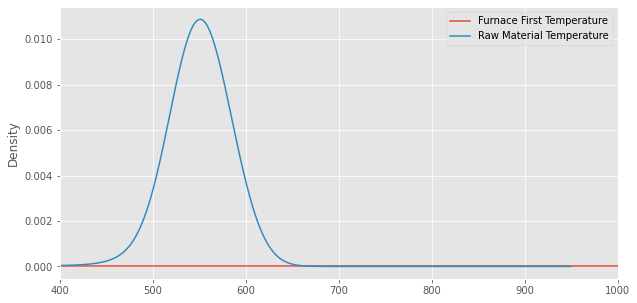

In [49]:
datasetFurnace.plot.density(y=['Furnace First Temperature', 'Raw Material Temperature'],xlim=[400,1000],figsize=[10,5])

In [50]:
#Diferenças entre temperatura inicial do forno e temperatura do material (TODO)
difference = 

SyntaxError: invalid syntax (<ipython-input-50-f62689adeb2f>, line 2)

In [62]:
#Consumo de energia explicado pela materia prima 1 e 2
datasetFurnace.describe()

,ID,Charge Raw Material 99,Charge Raw Material 1,Charge Raw Material 2,Total Charge,Tap Weight,Last Temperature,Tap Duration,Liquid Metal Yield,Gross Production,...,Total Oxygen Nm³,Oxygen Nm³/t,Carbon Injection Kg,Carbon Injection Kg/t,LimeCC,DoloCC,Slag Analysis B2,Slag Analysis B3,Furnace First Temperature,Raw Material Temperature
count,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,...,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,1.672300e+04,16723.000000
mean,8362.000000,5.067572,115509.969447,118.874310,123153.361568,130.336501,1581.261137,171.241356,88.613260,100681.160570,...,4077.773799,52.689888,2242.097590,37.231113,2445.108571,5928.244860,0.703200,0.460784,2.468110e+03,503.945225
std,4827.658611,11.552146,54885.757739,3787.037771,56417.709676,3.887501,84.977601,61.719277,28.769069,55794.426969,...,586.636745,801.729761,635.459804,619.790948,1229.340544,2219.207189,15.109241,0.597558,1.165348e+05,154.443173
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.517000e+03,0.000000
25%,4181.500000,0.000000,113840.000000,0.000000,142953.500000,128.950000,1568.000000,130.800000,85.842198,116397.000000,...,3682.720000,28.198950,1775.000000,13.660043,1015.000000,4006.000000,0.000000,0.000000,1.551000e+03,528.000000
50%,8362.000000,0.000000,144129.000000,0.000000,147923.000000,130.810000,1585.000000,160.800000,87.805623,130052.000000,...,3990.160000,30.714723,2189.000000,16.775986,2506.000000,5934.000000,0.000000,0.000000,1.571000e+03,548.000000
75%,12542.500000,0.000000,149089.000000,4.940000,150531.000000,132.450000,1601.000000,201.000000,90.072386,133623.000000,...,4424.320000,33.940423,2570.500000,19.731778,3727.500000,8179.000000,1.397836,1.102949,1.590000e+03,565.000000
max,16723.000000,109.000000,194062.000000,153534.000000,211076.000000,149.850000,1671.000000,1609.800000,3220.930233,245982.000000,...,10745.400000,35264.000000,7514.000000,23336.000000,6697.000000,16469.000000,1952.000000,2.118431,1.507154e+07,633.000000


In [61]:
#consumo é y 

AttributeError: 'DataFrame' object has no attribute 'feature_names'